In [1]:
import random
from matplotlib import pyplot as plt
from collections import Counter

In [17]:
num_friends = [random.randrange(0, 100) for _ in range(1000)]
print(num_friends)

[89, 97, 66, 80, 9, 4, 17, 39, 17, 62, 20, 93, 54, 8, 26, 59, 46, 88, 80, 14, 88, 17, 68, 22, 77, 38, 25, 71, 86, 24, 45, 28, 51, 67, 33, 75, 27, 50, 98, 37, 5, 26, 94, 81, 96, 17, 0, 57, 2, 62, 54, 56, 36, 62, 94, 74, 76, 73, 86, 4, 23, 2, 27, 90, 17, 53, 16, 33, 19, 43, 93, 60, 4, 14, 17, 78, 89, 70, 65, 81, 23, 79, 25, 2, 23, 44, 49, 91, 83, 97, 59, 3, 22, 22, 25, 92, 96, 92, 35, 84, 17, 39, 80, 4, 49, 9, 25, 75, 21, 12, 39, 4, 91, 89, 89, 88, 56, 62, 30, 93, 81, 82, 5, 32, 25, 92, 91, 73, 48, 83, 1, 60, 88, 88, 75, 86, 26, 13, 44, 9, 89, 92, 63, 47, 7, 33, 10, 57, 80, 25, 71, 37, 45, 27, 33, 32, 71, 18, 90, 76, 59, 63, 2, 14, 34, 29, 22, 26, 87, 36, 82, 52, 51, 13, 27, 76, 1, 60, 3, 21, 94, 85, 77, 74, 69, 24, 82, 74, 83, 65, 44, 91, 37, 40, 49, 93, 43, 42, 93, 97, 68, 71, 3, 32, 1, 70, 9, 5, 43, 38, 70, 46, 60, 18, 11, 85, 40, 8, 23, 87, 21, 7, 98, 2, 33, 76, 40, 29, 38, 36, 20, 9, 63, 84, 70, 43, 49, 38, 29, 55, 47, 65, 47, 82, 65, 78, 9, 23, 55, 67, 52, 21, 71, 3, 38, 4, 19, 33,

In [18]:
friend_counts = Counter(num_friends)

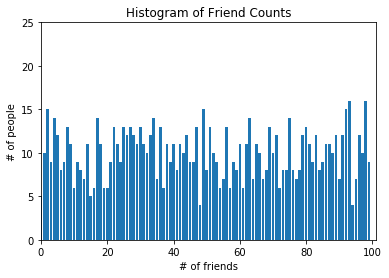

In [19]:
xs = range(101)
ys = [friend_counts[x] for x in xs] 
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

__Number of points__

In [20]:
num_points = len(num_friends)
print(num_points)

1000


__Largest and smallest values__

In [21]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

__Central tendencies__

In [22]:
def mean(x):
    return sum(x) / len(x)

In [24]:
mean(num_friends)

49.847

In [25]:
def median(v):
#"""finds the 'middle-most' value of v""" 
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
   #if odd, return the middle value 
      return sorted_v[midpoint]
    else:
# if even, return the average of the middle values 
      lo = midpoint - 1
      hi = midpoint
      return (sorted_v[lo] + sorted_v[hi]) / 2

In [26]:
median(num_friends)

49.0

In [27]:
def quantile(x, p):
#"""returns the pth-percentile value in x""" 
     p_index = int(p * len(x))
     return sorted(x)[p_index]
quantile(num_friends, 0.10) # 1 
quantile(num_friends, 0.25) # 3 
quantile(num_friends, 0.75) # 9 
quantile(num_friends, 0.90) # 13

91

__Dispersion__

In [33]:
def dot(v, w):
#"""v_1 * w_1 + ... + v_n * w_n""" 
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [34]:
def sum_of_squares(v):
#"""v_1 * v_1 + ... + v_n * v_n""" 
   return dot(v, v)

In [35]:
##Variance
def de_mean(x):
#"""translate x by subtracting its mean (so the result has mean 0)""" 
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [36]:
def variance(x):
#"""assumes x has at least two elements""" 
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [37]:
variance(num_friends)

846.9365275275263

In [39]:
import math
def standard_deviation(x): 
    return math.sqrt(variance(x))
standard_deviation(num_friends)

29.102173931298093

In [40]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(num_friends)

49

__Correlation__

In [43]:
daily_minutes = [random.randrange(0, 60) for _ in range(1000)]

In [44]:
def covariance(x, y): 
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1) 
covariance(num_friends, daily_minutes) 

-26.763029029028964

In [45]:
def correlation(x, y):
    stdev_x = standard_deviation(x) 
    stdev_y = standard_deviation(y) 
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y 
    else:
        return 0 # if no variation, correlation is zero 
correlation(num_friends, daily_minutes)

-0.05250352350705478

__Dont´forget => Simpson’s Paradox__